# 1. Geometry test

# 2. Digitizer

./simulation -m ../tests/mathusla40/run_parma_mathusla40.mac

Run digitizer

./digitizer data/run_0.root -p 100

In [21]:
import sys, os
import importlib
# importlib.import_module(module_name)
sys.path.append("../..")

import matplotlib.pyplot as plt
import numpy as np

from muhelper import root

In [360]:
fname_raw = "../../build/data/run_0.root"
fname_digi = "../../build/data/run_0.digi.root"

In [380]:
f1 = root.tfile(fname_raw)
f1.ls()
f1.get_tree("raw")
# f1.ls_tree()
# f1.get_entry(0)

f2 = root.tfile(fname_digi)
f2.ls()
f2.get_tree("digi")


None
None


TFile**		../../build/data/run_0.root	
 TFile*		../../build/data/run_0.root	
  KEY: TTree	raw;1	raw
  KEY: TTree	metadata;1	Simulation metadata
TFile**		../../build/data/run_0.digi.root	
 TFile*		../../build/data/run_0.digi.root	
  KEY: TTree	metadata;1	Metadata for digitization
  KEY: TTree	digi;1	Digitized Tree


In [381]:
def split_list(input_list, delimiter = -1):
    result = []
    current_sublist = []

    for value in input_list:
        if value == delimiter:
            # When -1 is encountered, append the current sublist to result and reset the sublist
            if current_sublist:
                result.append(current_sublist)
            current_sublist = []
        else:
            # Add value to the current sublist
            current_sublist.append(value)
    
    # Don't forget to append the last sublist if it has any values
    if current_sublist:
        result.append(current_sublist)

    return result
    
def process_digi(data):
    data["Digi_hitInds_split"] = split_list(data["Digi_hitInds"], delimiter=-1)

In [382]:
keys = ["residual_x", "residual_y", "residual_z", "residual_t", "direction", "det_id", "digi_x", "digi_y", "digi_z", "hit_x", "hit_y", "hit_z"] 
res = {key:[] for key in keys}

isbreak=False
for i in range(f1.entries):
# for i in [2]:
    
    data_raw = f1.get_entry(i)
    data_digi = f2.get_entry(i)

    process_digi(data_digi)

    for j in range(len(data_digi["Digi_x"])):
        raw_ind = data_digi["Digi_hitInds_split"][j][0]
        res["digi_x"].append(data_digi["Digi_x"][j])
        res["digi_y"].append(data_digi["Digi_y"][j])
        res["digi_z"].append(data_digi["Digi_z"][j])  
        res["hit_x"].append(data_raw["Hit_x"][raw_ind])
        res["hit_y"].append(data_raw["Hit_y"][raw_ind])
        res["hit_z"].append(data_raw["Hit_z"][raw_ind])          
        res["residual_x"].append(data_digi["Digi_x"][j] - data_raw["Hit_x"][raw_ind])
        res["residual_y"].append(data_digi["Digi_y"][j] - data_raw["Hit_y"][raw_ind])
        res["residual_z"].append(data_digi["Digi_z"][j] - data_raw["Hit_z"][raw_ind])
        res["residual_t"].append(data_digi["Digi_t"][j] - data_raw["Hit_t"][raw_ind])
        res["direction"].append(data_digi["Digi_direction"][j])
        res["det_id"].append(data_digi["Digi_detectorID"][j])
        if abs(res["residual_y"][-1])>100 and res["direction"][-1]==12:
            for raw_ind in data_digi["Digi_hitInds_split"][j]:
                # print(data_digi["Digi_y"][j], data_raw["Hit_y"][raw_ind], data_raw["Hit_x"][raw_ind], data_digi["Digi_detectorID"][j], data_raw["Hit_detectorID"][raw_ind])
                print(data_digi["Digi_z"][j], data_raw["Hit_y"][raw_ind], data_raw["Hit_x"][raw_ind], data_raw["Hit_z"][raw_ind],data_digi["Digi_detectorID"][j])

            print(i)
            isbreak=True
            # break

    # if isbreak:
    #     break

for key in res:
    res[key] = np.array(res[key])

All available bar directions:  [ 12 102 120 210]
163.23415803055116
10.165609146148569
0.9132447156851702
1.0008139576655515


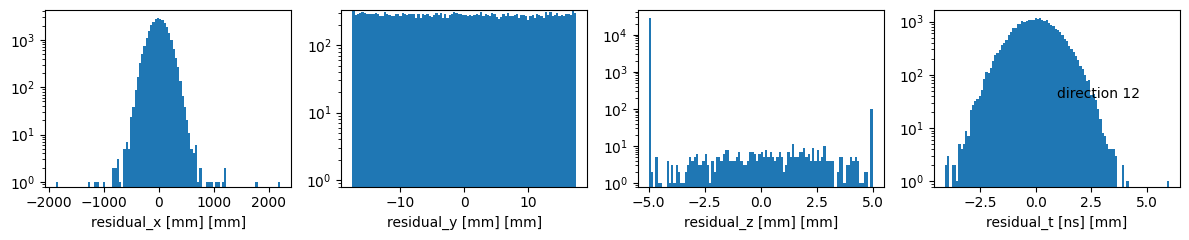

10.17943610903351
162.15460024784642
0.9561035553365825
1.005483291569732


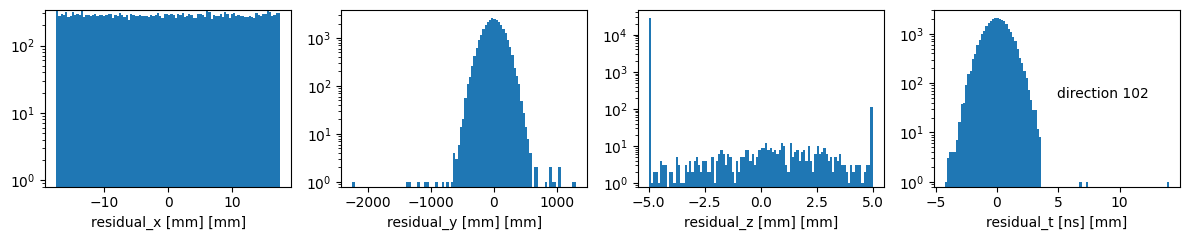

4.64019704353566
162.3401867540844
10.46445134002232
0.9894202926244338


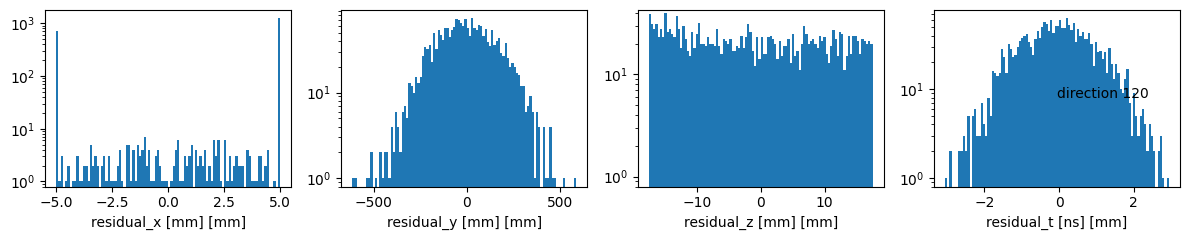

4.711567046240714
10.293523394659527
160.18529968504632
1.0077724524702043


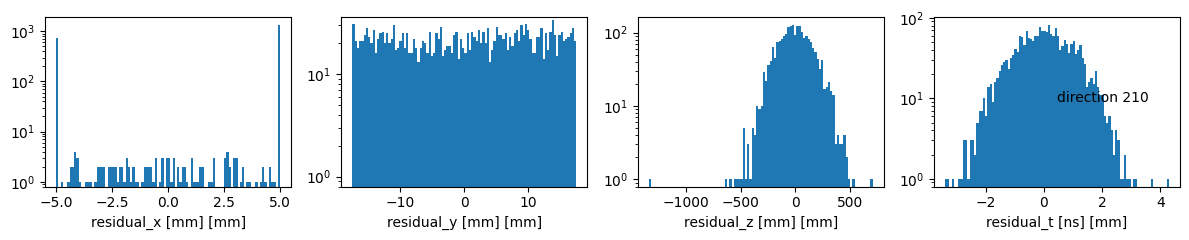

In [383]:
directions = np.unique(res["direction"])
print("All available bar directions: ", directions)

var_all = ['residual_x [mm]','residual_y [mm]','residual_z [mm]','residual_t [ns]']

for i,direction in enumerate(directions):
    mask = (res["direction"] == direction) #& ( res["digi_z"]<10000)
    fig,axes = plt.subplots(1, len(var_all), figsize=(3*len(var_all), 2.5))
    for j, var in enumerate(var_all):
        plt.sca(axes[j])
        plt.hist(res[var[:-5]][mask], bins=100);
        plt.yscale("log")
        plt.ylim(0.8,)
        plt.xlabel(var+" [mm]")
        print(np.std(res[var[:-5]][mask]))
    plt.text(0.5, 0.5, f"direction {direction}",transform = plt.gca().transAxes)
    fig.tight_layout()
    plt.show()

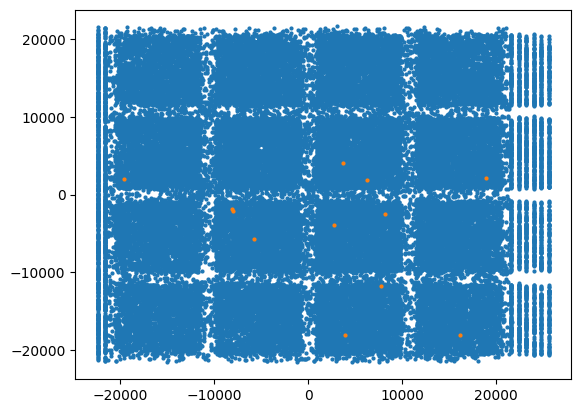

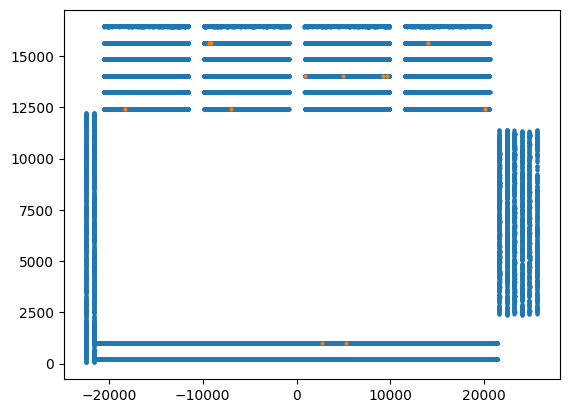

In [385]:
mask_b = (res["direction"] == 12) & (abs(res["residual_x"])>1000)
plt.scatter(res["digi_x"], res["digi_y"], s=4)
plt.scatter(res["digi_x"][mask_b], res["digi_y"][mask_b], s=4)
plt.show()

plt.scatter(res["hit_x"], res["hit_z"], s=4)
plt.scatter(res["hit_x"][mask_b], res["hit_z"][mask_b], s=4)

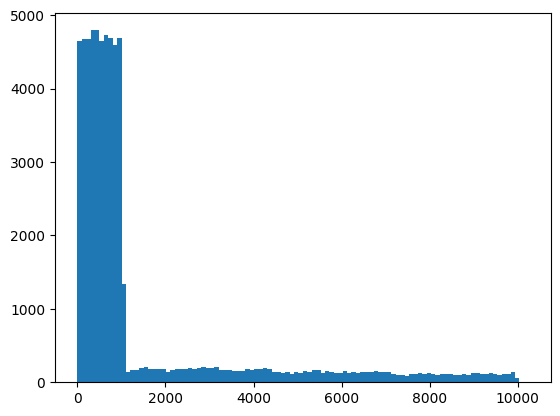

In [388]:
plt.hist(res["det_id"]%10000,bins=102, range=(0,10240));


In [35]:
# data_raw["Hit_x"],data_raw["Hit_y"]#, data_raw["Hit_z"], data_raw["Hit_detectorID"]

In [92]:
data_digi

{'Digi_x': [-6903.89208984375,
  -7817.5,
  -9707.5,
  -21611.19921875,
  -22411.19921875],
 'Digi_y': [-8132.5,
  -7326.1357421875,
  -5715.63818359375,
  4217.5,
  4900.59912109375],
 'Digi_z': [15633.599609375,
  14833.599609375,
  13233.599609375,
  2850.881591796875,
  87.5],
 'Digi_t': [-303.5856018066406,
  -299.8329162597656,
  -290.6226501464844,
  -226.97994995117188,
  -224.97694396972656],
 'Digi_edep': [3.2099850177764893,
  3.145004987716675,
  3.3647079467773438,
  2.4782493114471436,
  7.796252250671387],
 'Digi_trackID': [1, 1, 1, 1, 1],
 'Digi_pdgID': [13, 13, 13, 13, 13],
 'Digi_detectorID': [500400048,
  500300198,
  500100252,
  100000103180,
  100000002892],
 'Digi_type': [0, 0, 0, 0, 0],
 'Digi_hitInds': [0,
  -1,
  1,
  -1,
  2,
  -1,
  3,
  -1,
  4,
  5,
  8,
  7,
  6,
  9,
  10,
  11,
  12,
  13,
  14,
  -1],
 'Digi_direction': [12, 102, 102, 210, 120]}

In [77]:
f2.tree.Digi_detectorID

vector<Long64_t>{ 1216053862, 1215953168, 1215953178 }